Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [66]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [67]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [68]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [69]:
# YOUR CODE GOES HERE
print("transactions shape is: {}".format(transactions.shape))
print("items shape is: {}".format(items.shape))
print("item_categories shape is: {}".format(item_categories.shape))
print("shops shape is: {}".format(shops.shape))

transactions.head()

transactions shape is: (2935849, 6)
items shape is: (22170, 3)
item_categories shape is: (84, 2)
shops shape is: (60, 2)


date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [70]:
# little preprocessing 

transactions['date'] = pd.to_datetime(transactions['date'], format="%d.%m.%Y")
transactions['revenue'] = transactions['item_price'] * transactions['item_cnt_day']

date  date_block_num  shop_id  item_id  item_price  \
2       2013-01-05               0       25     2552      899.00   
148     2013-01-23               0       25     2321      999.00   
175     2013-01-07               0       25     2199     1449.00   
807     2013-01-02               0       25     2330      599.00   
1041    2013-01-13               0       25     5034     1989.00   
1193    2013-01-02               0       25     5651     5490.00   
1674    2013-01-07               0       25     4093      899.00   
1825    2013-01-02               0       25     4249     1894.87   
2411    2013-01-14               0       24     1628     3899.00   
3216    2013-01-08               0       24    20948      899.00   
3386    2013-01-20               0       24    11756      169.00   
3447    2013-01-20               0       24     9547      149.00   
3492    2013-01-12               0       24    10097      699.00   
3532    2013-01-07               0       24    15146      299.00   
3743    2013-01-07               0       24    14221      299.00   
4309    2013-01-11               0       25    12738     1499.00   
4675    2013-01-11               0       25    12858     1599.00   
4811    2013-01-11               0       25    17084     1199.00   
4927    2013-01-20               0       25    16746      399.00   
4950    2013-01-11               0       25    17790     1599.00   
5108    2013-01-11               0       25    17318     1249.50   
5505    2013-01-14               0       25    16451      499.00   
6251    2013-01-02               0       25     6241     1199.00   
7139    2013-01-11               0       25     9977     1199.00   
7174    2013-01-03               0       25     9511      149.00   
7277    2013-01-26               0       25     9696      549.00   
7576    2013-01-03               0       19    19989     2499.00   
7666    2013-01-08               0       19    17526      199.00   
7720    2013-01-15               0       19    19362     1998.50   
7894    2013-01-01               0       19    20383     1229.00   
...            ...             ...      ...      ...         ...   
2921035 2015-10-14              33        7    16179     2499.00   
2921261 2015-10-07              33        7     3351     3999.00   
2921586 2015-10-02              33        7     4415     1500.00   
2922502 2015-10-02              33       26    21363     3199.00   
2923221 2015-10-26              33       28     5656     5990.00   
2923357 2015-10-20              33       28     7230      699.00   
2923403 2015-10-27              33       28     7223     3999.00   
2923865 2015-10-03              33       25    21256     1299.00   
2924293 2015-10-03              33       25    18125      249.00   
2924406 2015-10-02              33       26    10513     1499.00   
2924442 2015-10-02              33       26    10352     4849.00   
2926713 2015-10-23              33       31     9313      349.00   
2926793 2015-10-15              33       31    10678     1499.00   
2926839 2015-10-20              33       31    10780      349.00   
2928586 2015-10-22              33       31     1523      799.00   
2929224 2015-10-08              33       21    16146     1799.00   
2929946 2015-10-08              33       25     1523      799.00   
2930269 2015-10-06              33       24     7039      299.00   
2931176 2015-10-30              33       22     8546     1299.00   
2932364 2015-10-28              33       25    13215      799.00   
2932589 2015-10-05              33       25    13476     7998.00   
2932636 2015-10-16              33       25    13400    18990.00   
2932721 2015-10-28              33       25    13304      799.00   
2933448 2015-10-21              33       25    16199     1999.00   
2933712 2015-10-03              33       25    14064      249.00   
2934243 2015-10-26              33       25     3917      449.00   
2934462 2015-10-18              33       25     4896     6398.00   
29

In [71]:
# sub_trs = transactions.sample(frac=0.15)
df_sep_2014 = transactions.loc[(transactions.date.dt.year == 2014) & (transactions.date.dt.month == 9)]
revs = df_sep_2014.groupby(['shop_id']).sum()['revenue']
revs.max()

7982852.1999999564

In [72]:
# YOUR CODE GOES HERE

max_revenue = revs.max()
del df_sep_2014
del revs
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [73]:
transactions = transactions.merge(items[['item_id', 'item_category_id']], on='item_id', how='left')
transactions['season'] = (transactions['date'].dt.month%12 + 3)//3

In [74]:
trans_datebased = transactions[transactions['revenue'] > 0].copy()
trans_datebased.set_index('date', inplace=True)
grpd_per = trans_datebased.groupby([trans_datebased.index.to_period('Y'), 'season', 'item_category_id']).sum()
max_rev = grpd_per.loc[(pd.Period('2014'), 3)]['revenue'].idxmax()
del grpd_per
del trans_datebased

In [75]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = max_rev
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [76]:
sub_trs = transactions.sample(frac=0.20)

In [77]:
(sub_trs.groupby('item_id').std()['item_price'] == 0).astype('int8').sum()
pd.isnull(sub_trs.groupby('item_id').std()['item_price']).astype('int8').sum()

2492

In [78]:
# transactions.sort_valuesues(by=['item_id', 'date'])
# transactions[transactions['item_id'] == 28].sort_values(by=['date', 'shop_id'])
gr_prices_ = transactions.groupby('item_id').std()['item_price']
unchanged = (gr_prices_ == 0).astype('int8').sum() + pd.isnull(gr_prices_).astype('int8').sum()
unchanged

5926

In [79]:
# YOUR CODE GOES HERE

num_items_constant_price = unchanged
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

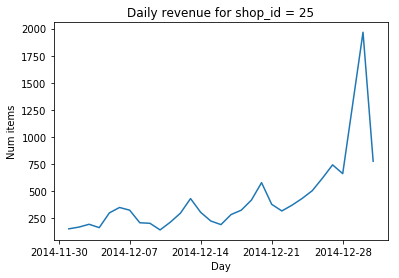

Current answer for task total_num_items_sold_var is: 117167.702299


In [84]:
shop_id = 25

sub_trans = transactions[(transactions.date.dt.month == 12) 
                         & (transactions.date.dt.year == 2014) 
                         & (transactions.shop_id == shop_id)].groupby('date').sum().sort_index()


total_num_items_sold = sub_trans.item_cnt_day.values
days = sub_trans.index

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = np.var(sub_trans.item_cnt_day.values, ddof=1)
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [87]:
STUDENT_EMAIL = ''
STUDENT_TOKEN = ''
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.702299


In [86]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)